In [1]:
#Galpy imports
import galpy
from galpy.orbit import Orbit
import galpy.potential as p
from galpy.potential import MWPotential2014 as MWPotential
from galpy.util import coords, conversion #for unit conversions

#Other imports
import numpy as np
import matplotlib.pyplot as plt
import astropy.coordinates as coord
from astropy import units as u

In [2]:
def astro_coord(R, sys):
    """
    takes in coords and converts them
    sys = "icrs": takes galactocentric
    and spits out icrs
    sys = "galc": takes icrs and 
    spits out galactocentric
    """
    if sys == "galc":
        
        cicrs = coord.SkyCoord(ra=R[0]*u.degree, dec=R[1]*u.degree, distance=R[2]*u.kpc,
                       frame=coord.ICRS)
        cg = cicrs.transform_to(coord.Galactocentric)
        return np.array([cg.x.value, cg.y.value, cg.z.value])

    if sys == "icrs":
        cg = coord.SkyCoord(x=R[0]*u.kpc, y=R[1]*u.kpc, z=R[2]*u.kpc,
                       frame=coord.Galactocentric)
        cicrs = cg.transform_to(coord.ICRS)
        return np.array([cicrs.ra.value, cicrs.dec.value, cicrs.distance.value])

def galpy_coord(orbit, i, sys):
    """
    takes in icrs coords and convert them
    to galactocentric coordinates. sys 
    argument indicates which coordinate
    system to convert to. 
    """
    if sys == "galc":
        ###GALPY IS LEFT HANDED! 
        ###Changed the sign of x axis to make frame right-handed!
        return np.array([-orbit.x(t[i]),orbit.y(t[i]),orbit.z(t[i])])
    if sys == "icrs":
        return np.array([orbit.ra(t[i]),orbit.dec(t[i]),orbit.dist(t[i])])
    
def plot(axs, t, r, sys, color):
    """
    takes a 3D axis object and the 
    position vectors to plot it over time 
    """
    
    axs[0].plot(t, r[:,0], color = color)
    axs[1].plot(t, r[:,1], color = color)
    axs[2].plot(t, r[:,2], color = color)
    
#    for ax in axs:
#        ax.set_xlabel("Time")
    if sys == "galc":
        axs[0].set_ylabel("X")
        axs[1].set_ylabel("Y")
        axs[2].set_ylabel("Z")
    if sys == "icrs":
        axs[0].set_ylabel("ra")
        axs[1].set_ylabel("dec")
        axs[2].set_ylabel("distance")

In [3]:
#Arbitrary Close Object
orb = Orbit.from_name("LMC")
t = np.linspace(0,0.1,num=1001)*u.Myr
orb.integrate(t, MWPotential)

In [4]:
galpy_icrs = galpy_coord(orb, 0, "icrs" )

#These two are good
galpy_galc = galpy_coord(orb, 0, "galc")
astro_galc = astro_coord(galpy_icrs, "galc")

n = 100
galc_rang = np.zeros((3, n))
for i in range(3):
    #print(min(galpy_galc[i], astro_galc[i]))
    #print(max(galpy_galc[i], astro_galc[i]))
    a = np.linspace(min(galpy_galc[i], astro_galc[i]), max(galpy_galc[i], astro_galc[i]), n)
    galc_rang[i] += a

['Difference: 0.1208853108777137', 'Difference: 1.2876100186076656e-09', 'Difference: 0.0002730575625591314']


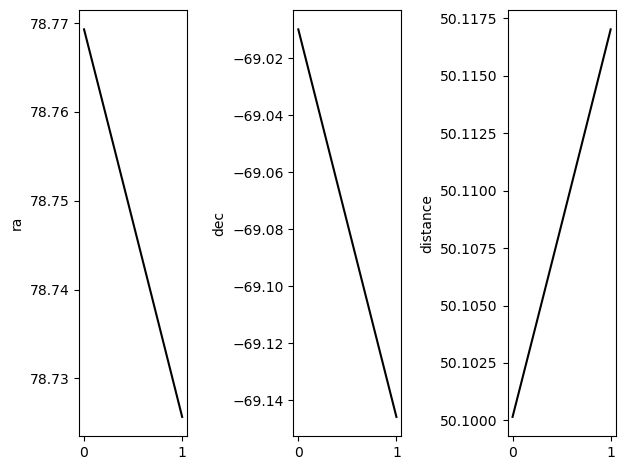

In [5]:
galc_diff = np.zeros(3)
for i in range(3):
    galc_diff[i] += (np.max(galc_rang[i]) - np.min(galc_rang[i]))

galc_rang_p = np.transpose(galc_rang)
astro_icrss = np.zeros((n,3))
for i in range(n):
    ag = astro_coord(galc_rang_p[i], "icrs")
    astro_icrss[i] += ag

labels = [f"Difference: {galc_diff[0]}", f"Difference: {galc_diff[1]}", f"Difference: {galc_diff[2]}"]
print(labels)

dom = np.linspace(0,1,n)    
fig, axes = plt.subplots(1,3)
plot(axes, dom, astro_icrss, "icrs", "k")
plt.tight_layout()

It turns out that converting from galactocentric to icrs is just really sensitive. Miniscule changes in galactic position results in drastic changes in the icrs coordinate system. These effects are miniscule for Leo I though, probably due to its distance.